# Quantitative Analysis of a Stock


In [1]:
# CHOOSE TICKER

ticker = 'GOOG'

In [2]:
# dependencies

!pip install pandas numpy matplotlib yfinance

[*********************100%%**********************]  1 of 1 completed


                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2020-01-02  67.077499  68.406998  67.077499  68.368500  68.290787  28132000
2020-01-03  67.392998  68.625000  67.277199  68.032997  67.955666  23728000
2020-01-06  67.500000  69.824997  67.500000  69.710503  69.631264  34646000
2020-01-07  69.897003  70.149498  69.518997  69.667000  69.587814  30054000
2020-01-08  69.603996  70.579002  69.542000  70.216003  70.136192  30560000


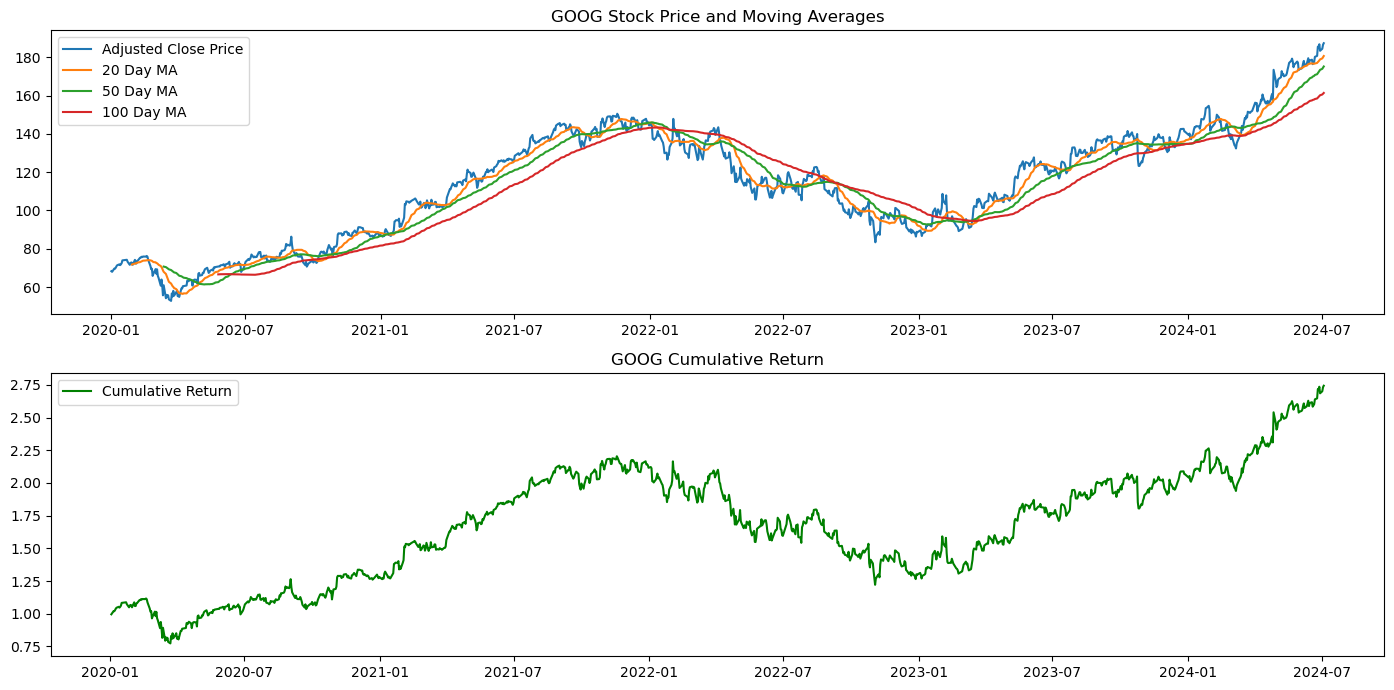

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch historical data for a specific stock
start_date = '2020-01-01'
end_date = '2024-07-04'
data = yf.download(ticker, start=start_date, end=end_date)

# Display the first few rows of the data
print(data.head())

# Calculate daily returns
data['Daily Return'] = data['Adj Close'].pct_change()

# Calculate cumulative returns
data['Cumulative Return'] = (1 + data['Daily Return']).cumprod()

# Calculate moving averages
data['20 Day MA'] = data['Adj Close'].rolling(window=20).mean()
data['50 Day MA'] = data['Adj Close'].rolling(window=50).mean()
data['100 Day MA'] = data['Adj Close'].rolling(window=100).mean()

# Plot the closing price, moving averages, and cumulative return
plt.figure(figsize=(14, 7))

# Subplot 1: Adjusted Close Price and Moving Averages
plt.subplot(2, 1, 1)
plt.plot(data['Adj Close'], label='Adjusted Close Price')
plt.plot(data['20 Day MA'], label='20 Day MA')
plt.plot(data['50 Day MA'], label='50 Day MA')
plt.plot(data['100 Day MA'], label='100 Day MA')
plt.title(f'{ticker} Stock Price and Moving Averages')
plt.legend()

# Subplot 2: Cumulative Return
plt.subplot(2, 1, 2)
plt.plot(data['Cumulative Return'], label='Cumulative Return', color='green')
plt.title(f'{ticker} Cumulative Return')
plt.legend()

plt.tight_layout()
plt.show()


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume,Daily Return,Cumulative Return,20 Day MA,50 Day MA,100 Day MA
Date,,,,,,,,,,,
2020-01-02,67.077499,68.406998,67.077499,68.368500,68.290787,28132000,NaN,NaN,NaN,NaN,NaN
2020-01-03,67.392998,68.625000,67.277199,68.032997,67.955666,23728000,-0.004907,0.995093,NaN,NaN,NaN
2020-01-06,67.500000,69.824997,67.500000,69.710503,69.631264,34646000,0.024657,1.019629,NaN,NaN,NaN
2020-01-07,69.897003,70.149498,69.518997,69.667000,69.587814,30054000,-0.000624,1.018993,NaN,NaN,NaN
2020-01-08,69.603996,70.579002,69.542000,70.216003,70.136192,30560000,0.007880,1.027023,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-06-27,185.645004,187.500000,185.449997,186.860001,186.860001,13025700,0.008038,2.736240,178.416684,172.937291,159.821273
2024-06-28,185.720001,186.580002,183.324997,183.419998,183.419998,23032400,-0.018410,2.685867,178.919548,173.471657,160.207820
2024-07-01,184.479996,185.339996,182.729996,184.490005,184.490005,11815900,0.005834,2.701536,179.455935,174.015836,160.600273


# 1. Technical Indicators

## Relative Strength Index (RSI)


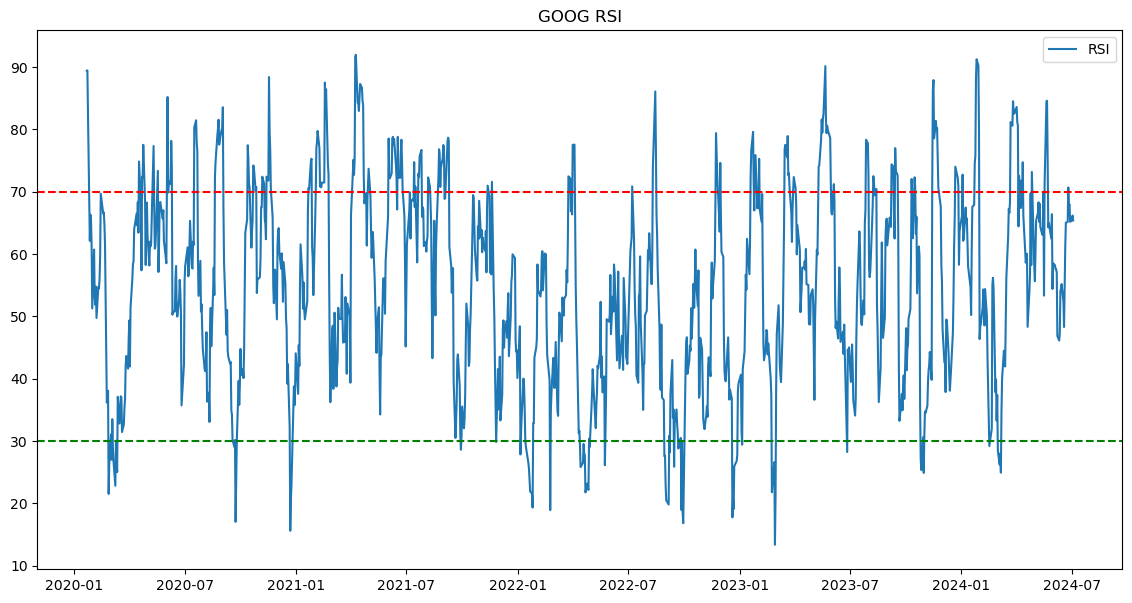

In [5]:
def calculate_rsi(data, window):
    delta = data['Adj Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data, 14)

plt.figure(figsize=(14, 7))
plt.plot(data['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title(f'{ticker} RSI')
plt.legend()
plt.show()

### What is Relative Strength Index (RSI) ? 


The Relative Strength Index (RSI) is a momentum oscillator used in technical analysis to measure the speed and change of price movements. It is used to identify overbought or oversold conditions in a stock or other asset. The RSI ranges from 0 to 100 and is typically calculated over a 14-day period.

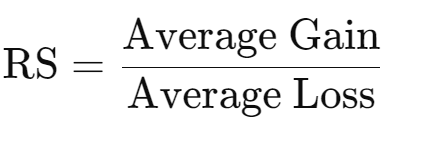

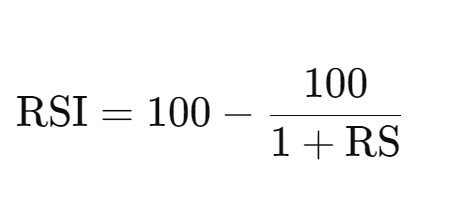

### Interpretation of RSI
**Overbought**: An RSI above 70 is considered overbought, indicating that the asset may be overvalued and a price correction or pullback could occur.
**Oversold**: An RSI below 30 is considered oversold, suggesting that the asset may be undervalued and a price bounce or reversal could occur.

**Mid-range**: An RSI around 50 indicates neutral conditions.

## Bollinger Bands

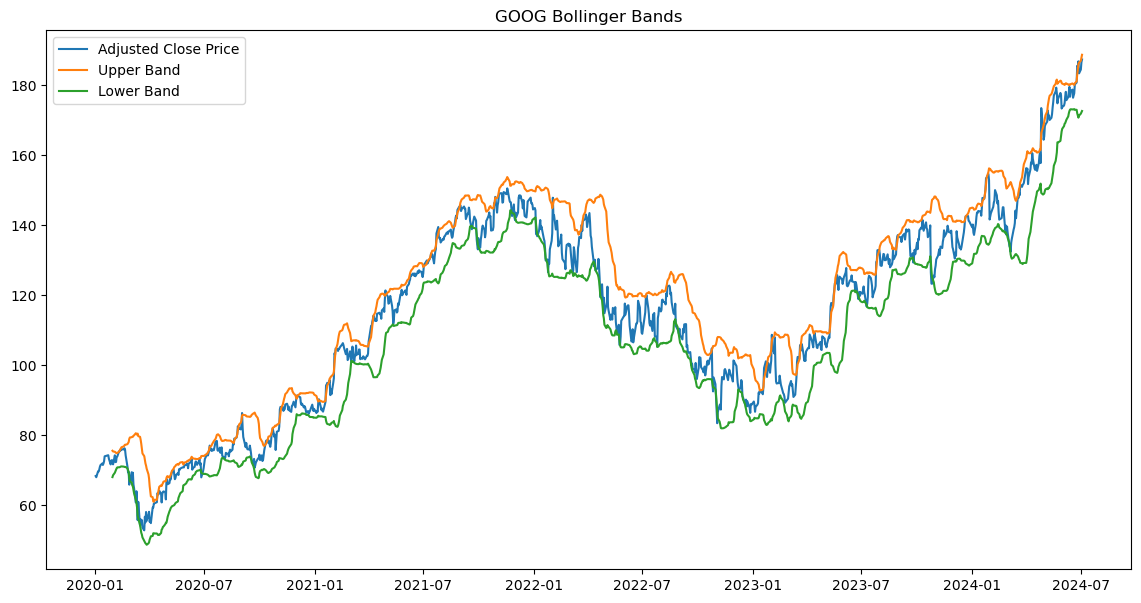

In [6]:
data['20 Day MA'] = data['Adj Close'].rolling(window=20).mean()
data['20 Day Std'] = data['Adj Close'].rolling(window=20).std()
data['Upper Band'] = data['20 Day MA'] + (data['20 Day Std'] * 2)
data['Lower Band'] = data['20 Day MA'] - (data['20 Day Std'] * 2)

plt.figure(figsize=(14, 7))
plt.plot(data['Adj Close'], label='Adjusted Close Price')
plt.plot(data['Upper Band'], label='Upper Band')
plt.plot(data['Lower Band'], label='Lower Band')
plt.title(f'{ticker} Bollinger Bands')
plt.legend()
plt.show()


# 2. Volume Analysis
Volume can be an important indicator of the strength of a price movement.

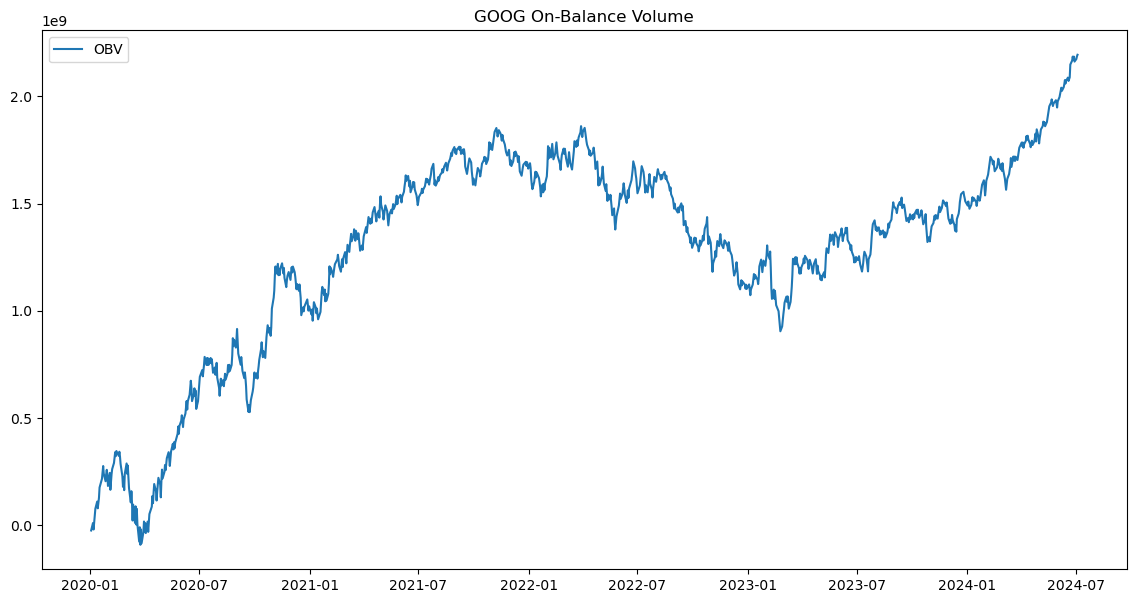

In [7]:
# On-Balance Volume (OBV)
data['OBV'] = (np.sign(data['Adj Close'].diff()) * data['Volume']).cumsum()

plt.figure(figsize=(14, 7))
plt.plot(data['OBV'], label='OBV')
plt.title(f'{ticker} On-Balance Volume')
plt.legend()
plt.show()

# 3. Statistical Analysis

Statistical measures can help understand the risk and return characteristics of the stock.

In [8]:
annualized_volatility = data['Daily Return'].std() * np.sqrt(252)
annualized_return = data['Daily Return'].mean() * 252

print(f'Annualized Volatility: {annualized_volatility}')
print(f'Annualized Return: {annualized_return}')


Annualized Volatility: 0.32852045339482827
Annualized Return: 0.2787831828378117


In [9]:
risk_free_rate = 0.01  # Example: 1% risk-free rate
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility

print(f'Sharpe Ratio: {sharpe_ratio}')


Sharpe Ratio: 0.8181627051231966


# 4. Regression Analysis


### CAPM (Capital Asset Pricing Model)

In [10]:
market_data = yf.download('^GSPC', start=start_date, end=end_date)  # S&P 500 index data
data['Market Return'] = market_data['Adj Close'].pct_change()
data = data.dropna()

import statsmodels.api as sm
X = data['Market Return']
y = data['Daily Return']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())


[*********************100%%**********************]  1 of 1 completed


                            OLS Regression Results                            
Dep. Variable:           Daily Return   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     1131.
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          5.58e-168
Time:                        23:06:19   Log-Likelihood:                 2995.8
No. Observations:                1034   AIC:                            -5988.
Df Residuals:                    1032   BIC:                            -5978.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0003      0.000      0.647

# 5. Risk Measures


## Value at Risk (VaR)

In [11]:
VaR_95 = np.percentile(data['Daily Return'], 5)
print(f'95% Value at Risk: {VaR_95}')

95% Value at Risk: -0.029480903767757704


# 6. Mean-Variance Optimzation


In [12]:
# install module
!pip install PyPortfolioOpt

In [13]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models, expected_returns

tickers = ['AAPL', 'MSFT', 'GOOG', 'NVDA']
stock_data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
mu = expected_returns.mean_historical_return(stock_data)
S = risk_models.sample_cov(stock_data)

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)


[*********************100%%**********************]  4 of 4 completed

OrderedDict([('AAPL', 0.0), ('GOOG', 0.0), ('MSFT', 0.0), ('NVDA', 1.0)])
Expected annual return: 97.9%
Annual volatility: 54.0%
Sharpe Ratio: 1.78


(0.9792709272273841, 0.5403740400763838, 1.7751980222658137)